In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('used_cars_data.csv')
df.head()

,Unnamed: 0,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


In [4]:
df.shape

(792, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          792 non-null    object
 1   model          792 non-null    object
 2   price (eur)    792 non-null    int64 
 3   engine         792 non-null    object
 4   year           792 non-null    int64 
 5   mileage (kms)  792 non-null    int64 
 6   fuel           792 non-null    object
 7   gearbox        792 non-null    object
 8   location       792 non-null    object
dtypes: int64(3), object(6)
memory usage: 55.8+ KB


In [6]:
df1 = df.copy(deep=True)
df1.shape

(792, 9)

In [7]:
df1.isnull().values.any()

False

In [8]:
df1['brand_average'] = df1.groupby(['brand'])['price (eur)'].transform('mean').round(2)

In [9]:
df1.head()

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location,brand_average
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers,14828.45
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans,15429.13
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans,21667.37
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans,16747.84
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1,12419.03


In [10]:
df1['brand_average'].describe()

count      792.000000
mean     15973.383624
std       3818.946538
min       6490.000000
25%      13805.075000
50%      14828.450000
75%      16747.840000
max      29990.000000
Name: brand_average, dtype: float64

In [13]:
def group_brand(value):
    if value > 20000:
        return 'high'
    elif value > 15000 and value < 20000:
        return 'mid'
    elif value > 10000 and value < 15000:
        return 'low'
    else:
        return 'very low'

In [14]:
df1['brand_group'] = df1.apply(lambda x: group_brand(x['brand_average']),axis=1)

In [15]:
df1 = df1.drop('brand', axis = 1)
df1 = df1.drop('brand_average', axis = 1)

In [17]:
df1.brand_group.value_counts()

low         395
mid         255
high        134
very low      8
Name: brand_group, dtype: int64

In [18]:
df1.head()

,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location,brand_group
0,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers,low
1,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans,mid
2,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans,high
3,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans,mid
4,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1,low


Engine avg

In [19]:
df1['engine_average'] = df1.groupby(['engine'])['price (eur)'].transform('mean').round(2)

In [20]:
df1.engine_average.describe()

count      792.000000
mean     15973.383864
std       6702.406814
min       4990.000000
25%      11490.000000
50%      14990.000000
75%      18490.000000
max      58990.000000
Name: engine_average, dtype: float64

In [21]:
df1['engine_group'] = df1.apply(lambda x: group_brand(x['engine_average']),axis=1)

In [23]:
df1.engine_group.value_counts()

low         306
mid         217
high        140
very low    129
Name: engine_group, dtype: int64

In [24]:
df1 = df1.drop('engine', axis = 1)
df1 = df1.drop('engine_average', axis = 1)

In [25]:
df1.head()

,model,price (eur),year,mileage (kms),fuel,gearbox,location,brand_group,engine_group
0,Ibiza,8990,2016,67000,Gasolina,Manual,Granollers,low,very low
1,i30,9990,2014,104868,Diésel,Manual,Viladecans,mid,very low
2,Serie 5,13490,2011,137566,Diésel,Automatica,Viladecans,high,low
3,Golf,24990,2018,44495,Gasolina,Manual,Viladecans,mid,high
4,Corsa,10460,2016,69800,Gasolina,Manual,Sabadell 1,low,low


In [26]:
df1.nunique()

model            206
price (eur)      170
year              16
mileage (kms)    686
fuel               5
gearbox            2
location          10
brand_group        4
engine_group       4
dtype: int64

In [30]:
df1['location_average'] = df1.groupby(['location'])['price (eur)'].transform('mean').round(2)

<AxesSubplot: xlabel='location', ylabel='location_average'>

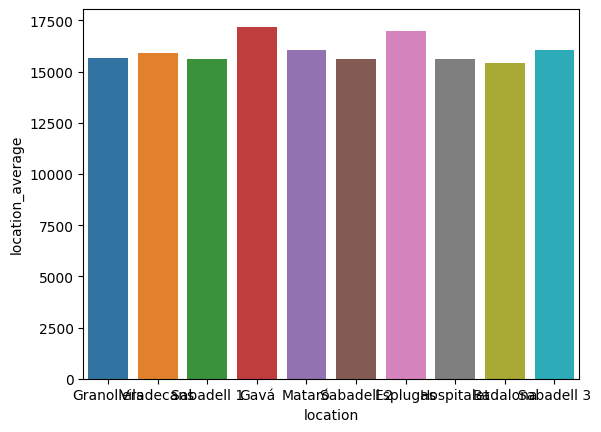

In [34]:
sns.barplot(x="location", y="location_average", data=df1)

No need to classify since same

year

In [35]:
df1['year_average'] = df1.groupby(['year'])['price (eur)'].transform('mean').round(2)

<AxesSubplot: xlabel='year', ylabel='price (eur)'>

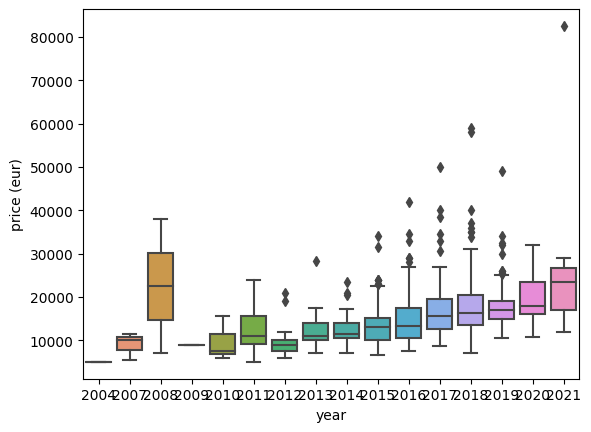

In [38]:
sns.boxplot(x="year", y="price (eur)", data=df1)

make condition based on trends

In [39]:
def group_year(value):
    if value > 2018:
        return '2018+'
    elif value > 2012 and value < 2018:
        return '2012+'
    elif value > 2008 and value < 2012:
        return '2008+'
    else:
        return '2008-'

In [40]:
df1['year_group'] = df1.apply(lambda x: group_year(x['year']),axis=1)

In [41]:
df1.year_group.value_counts()

2012+    437
2008-    179
2018+    145
2008+     31
Name: year_group, dtype: int64

In [42]:
df1 = df1.drop('year', axis = 1)
df1 = df1.drop('year_average', axis = 1)

In [44]:
df1 = df1.drop('location_average', axis = 1)

In [45]:
df1.head()

,model,price (eur),mileage (kms),fuel,gearbox,location,brand_group,engine_group,year_group
0,Ibiza,8990,67000,Gasolina,Manual,Granollers,low,very low,2012+
1,i30,9990,104868,Diésel,Manual,Viladecans,mid,very low,2012+
2,Serie 5,13490,137566,Diésel,Automatica,Viladecans,high,low,2008+
3,Golf,24990,44495,Gasolina,Manual,Viladecans,mid,high,2008-
4,Corsa,10460,69800,Gasolina,Manual,Sabadell 1,low,low,2012+


Model

In [46]:
df1['model_average'] = df1.groupby(['model'])['price (eur)'].transform('mean').round(2)

In [47]:
df1.model_average.describe()

count      792.000000
mean     15973.384318
std       5630.107092
min       4990.000000
25%      11990.000000
50%      15171.820000
75%      17283.330000
max      58990.000000
Name: model_average, dtype: float64

In [48]:
df1['model_group'] = df1.apply(lambda x: group_brand(x['model_average']),axis=1)

In [50]:
df1.model_group.value_counts()

low         325
mid         301
high        112
very low     54
Name: model_group, dtype: int64

In [ ]:
df1 = df1.drop('engine', axis = 1)
df1 = df1.drop('engine_average', axis = 1)

In [ ]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 6 categorical variables

The categorical variables : ['brand', 'model', 'engine', 'fuel', 'gearbox', 'location']


In [ ]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 3 numerical variables

The numerical variables : ['price (eur)', 'year', 'mileage (kms)']


In [ ]:
df1[categorical].nunique()

brand        36
model       206
engine      694
fuel          5
gearbox       2
location     10
dtype: int64

In [ ]:
df1.head()

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


In [ ]:
df1.drop(['model','engine'],axis=1,inplace=True)

In [ ]:
df1.shape

(792, 7)

In [ ]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 4 categorical variables

The categorical variables : ['brand', 'fuel', 'gearbox', 'location']


In [ ]:
df1[categorical].nunique()

brand       36
fuel         5
gearbox      2
location    10
dtype: int64

In [ ]:
df2 = pd.get_dummies(data=df1, columns=categorical, drop_first=True)
df2.shape

(792, 52)

Feature engineering

In [ ]:
X = df2.drop(['price (eur)'],axis=1)
y = df2['price (eur)']

X.shape, y.shape

((792, 51), (792,))

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((633, 51), (159, 51), (633,), (159,))

Models!

In [ ]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
y_pred_lin = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 2907.743
Root Mean Square Error: 3901.625
R2 Score: 0.637


Linear Model very bad!

Random Forest

We need to scale for RF

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [ ]:
X_train_RF.shape, X_test_RF.shape

((633, 51), (159, 51))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred_RF = rf.predict(X_test_RF)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3)))

Mean Absolute Error: 3239.472
Root Mean Square Error: 4277.82
R2 Score: 0.564


With 100 trees

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred_RF_100 = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3)))

Mean Absolute Error: 3181.858
Root Mean Square Error: 4376.028
R2 Score: 0.544


Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

rf_cv = RandomForestRegressor(random_state=42)

clf = GridSearchCV(rf_cv, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


In [ ]:
y_pred_RF_cv = clf.best_estimator_.predict(X_test_RF)
# print(y_pred_RF_100)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rfcv = mean_absolute_error(y_test,y_pred_RF_cv)
rmse_rfcv = sqrt(mean_squared_error(y_test,y_pred_RF_cv))
r_sq_rfcv = r2_score(y_test,y_pred_RF_cv)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rfcv,3),round(rmse_rfcv,3),round(r_sq_rfcv,3)))

Mean Absolute Error: 3157.57
Root Mean Square Error: 4386.143
R2 Score: 0.542


In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

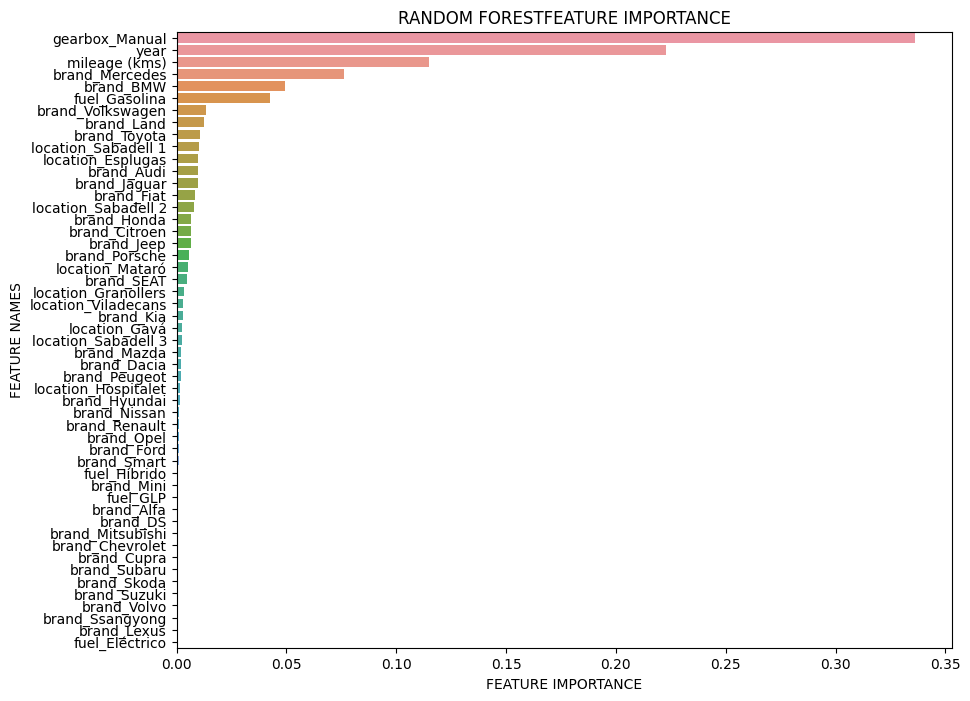

In [ ]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST')

CNN